# Correlations of Sepals and Petals Dimensions
**Name:** Brandon Shellenberger<br>
**Date:** January 28, 2024<br>

In this project, I will demonstrate the use of jupyter notebooks while exploring a common dataset, *iris.csv*.
Near the end of this project, these questions will be answered:
 - Is there a correlation between petal lengths and petal widths?
 - Is there a correlation between sepal lengths and sepal widths?

### Importing External Libraries

In [90]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Loading and Inspecting the *iris.csv* Dataset
Loading the data as a DataFrame and printing the first 10 rows shows how the data is formatted.
There are 150 entries with 4 columns that are float values (numerical) and 1 column that is an object value (categorical). I am assuming all measurements are in milimeters (mm).

In [91]:
# Load dataset into DataFrame
df = sns.load_dataset('iris')

# General inspection of dataset
print(df.head(10))
print(df.shape)
print(df.dtypes)

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
5           5.4          3.9           1.7          0.4  setosa
6           4.6          3.4           1.4          0.3  setosa
7           5.0          3.4           1.5          0.2  setosa
8           4.4          2.9           1.4          0.2  setosa
9           4.9          3.1           1.5          0.1  setosa
(150, 5)
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


### Descriptive Analysis
This shows the descriptive statistics of numerical columns and prints the number of NULL values in the data set. Looking at the averages of each column, sepal dimensions are slightly larger than petal dimensions.

In [92]:
# Inspects statistics on each numerical column
print(f'{df.describe()}\n')

# looks for NaN values and prints a statement
if df.isnull().values.any() == False:
    print('There are zero NULL values in the dataset.')
else:
    print(f'There are {df.isnull().sum()} NULL values in the dataset.')

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

There are zero NULL values in the dataset.


This histogram shows the number of each type of spceies. All three species have an equal amount recorded in the dataset.

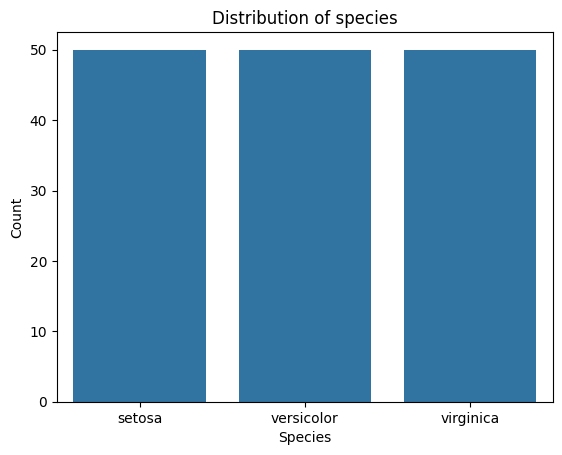

In [93]:
# Inspects value counts for one categorical column
df['species'].value_counts()

# Inspects value counts for all categorical columns
for col in df.select_dtypes(include=['object','category']).columns:
    # Displays count plot
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')

plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

#### Renaming columns

In [94]:
# Renaming column names
df.rename(columns={'sepal_length': 'Sepal Length',
                   'sepal_width': 'Sepal Width',
                   'petal_length': 'Petal Length',
                   'petal_width': 'Petal Width',
                   'species': 'Species'}, inplace=True)

### Further analysis
Below is a histogram for petal length and a histogram for all of the numerical columns. The number of bins is higher than normal for a more detailed analysis.

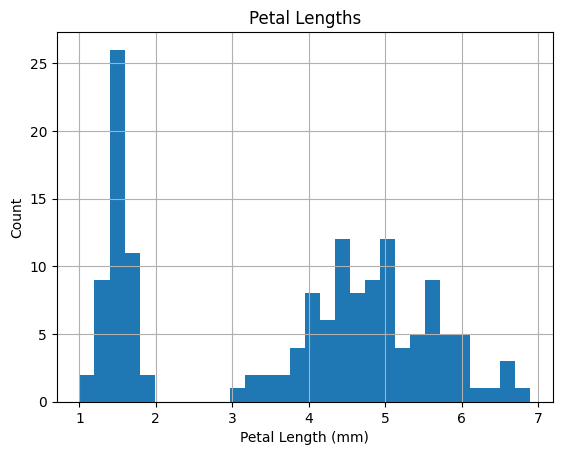

In [95]:
# Displays a histogram of one numerical column
df['Petal Length'].hist(bins= 30)
plt.title('Petal Lengths')
plt.xlabel('Petal Length (mm)')
plt.ylabel('Count')

plt.show()

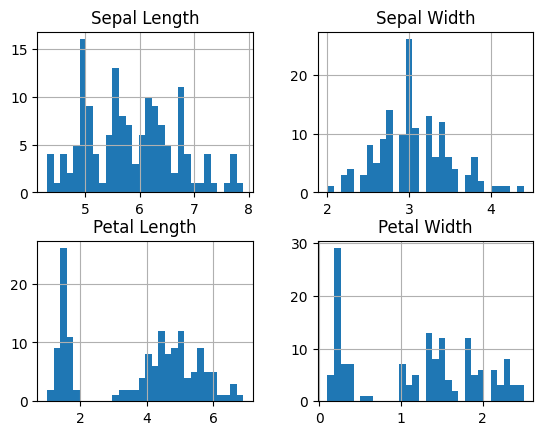

In [96]:
# Displays a histogram of all the numerical columns
df.hist(bins= 30)

plt.show()

It looks like there might be a correlation between petal length and petal width. This might not be true for the sepal dimensions but we shall answer the first question now.

-  #### Is there a correlation between petal lengths and petal widths?
This scatter plot shows the relationship between petal length and petal width. The correlation between the two measurements is shown as well.

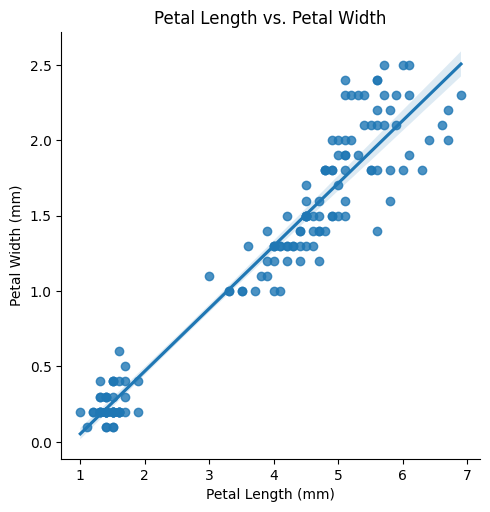

Correlation Coefificent between Petal Length and Petal Width: 0.9628654314027963


In [97]:
# scatter plot with linear model
sns.lmplot(data= df, x= 'Petal Length', y= 'Petal Width')
plt.xlabel('Petal Length (mm)')
plt.ylabel('Petal Width (mm)')
plt.title('Petal Length vs. Petal Width')
plt.show()

# Showing Correlation
print(f'Correlation Coefificent between Petal Length and Petal Width: {df["Petal Length"].corr(df["Petal Width"])}')

There is a very strong positive correlation between the petal dimensions. But I am wondering about the grouping in the lower left corner that might not have a correlation. The next plot is simlar as above, but the different colors are the different species. Below that is a correlation coefficient matix for each species.

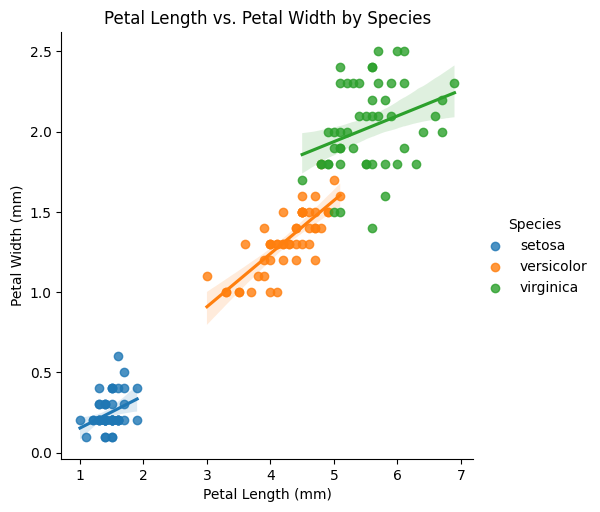

Petal Length  Petal Width
Species                                           
setosa     Petal Length      1.000000     0.331630
           Petal Width       0.331630     1.000000
versicolor Petal Length      1.000000     0.786668
           Petal Width       0.786668     1.000000
virginica  Petal Length      1.000000     0.322108
           Petal Width       0.322108     1.000000

In [99]:
# scatter plot with linear models
sns.lmplot(df, x= 'Petal Length', y= 'Petal Width', hue= 'Species')
plt.xlabel('Petal Length (mm)')
plt.ylabel('Petal Width (mm)')
plt.title('Petal Length vs. Petal Width by Species')
plt.show()

# Correlation for each species
df.groupby('Species')[['Petal Length', 'Petal Width']].corr()

The lower left grouping turns out to all be setosa's. The correlation of the setosa's are slightly positive, but more scattered which is noticable from the graph. The virginica species has a similar correlation to the setosa's and the vericolor's have a stronger correlation, close at 0.8. Let's see if this analysis is similar with the sepal dimensions.

-  #### Is there a correlation between sepal lengths and sepal widths?

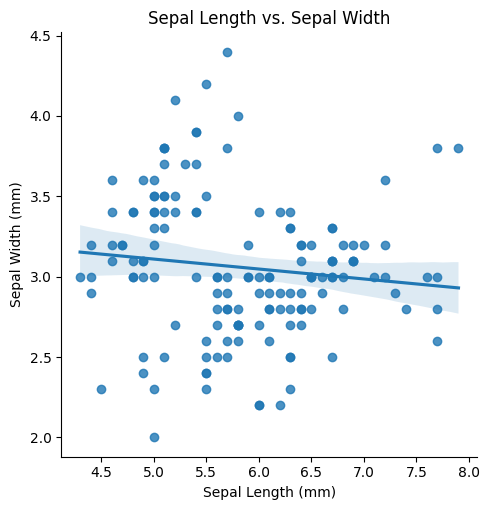

Correlation Coefificent between Petal Length and Petal Width: -0.11756978413300198


In [100]:
# scatter plot with linear model
sns.lmplot(df, x= 'Sepal Length', y= 'Sepal Width')
plt.xlabel('Sepal Length (mm)')
plt.ylabel('Sepal Width (mm)')
plt.title('Sepal Length vs. Sepal Width')
plt.show()

# correlation coefficient
print(f'Correlation Coefificent between Petal Length and Petal Width: {df["Sepal Length"].corr(df["Sepal Width"])}')

At first glance, the datapoints hardly have any correlation and coefficient proves this to be true. Just like the petals, the next graph will show the different species and their respective correlations.

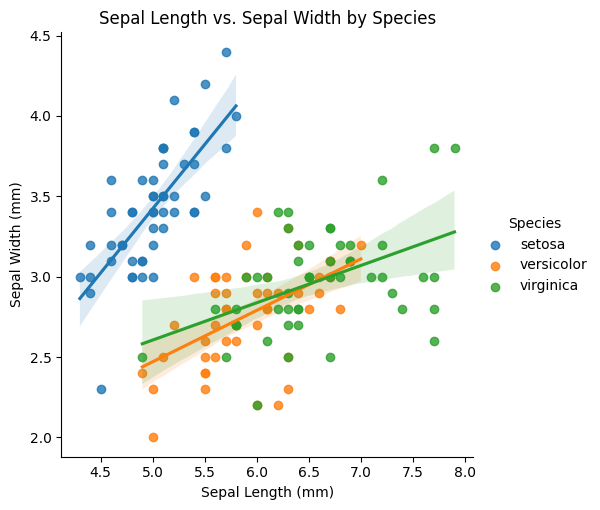

Sepal Length  Sepal Width
Species                                           
setosa     Sepal Length      1.000000     0.742547
           Sepal Width       0.742547     1.000000
versicolor Sepal Length      1.000000     0.525911
           Sepal Width       0.525911     1.000000
virginica  Sepal Length      1.000000     0.457228
           Sepal Width       0.457228     1.000000

In [102]:
# scatter plot with linear models
sns.lmplot(df, x= 'Sepal Length', y= 'Sepal Width', hue= 'Species')
plt.xlabel('Sepal Length (mm)')
plt.ylabel('Sepal Width (mm)')
plt.title('Sepal Length vs. Sepal Width by Species')
plt.show()

# Correlation for each species
df.groupby('Species')[['Sepal Length', 'Sepal Width']].corr()

All 3 species have a postive correlation with the setosa's showing a stronger correlation. Looking at both petal and sepal dimensions, the setosa's are a a lot smaller in size compared to the vericolor and virginica species.

### Ratio Analysis
There is one last analysis I want to look at before the conclusion of this project. I want to compare the proportions of each petal and sepal dimensions. Basically, I want to know how 'square' each of the petals and sepals are. To do this, I need to make two new columns in the data set that will divide length by width of each petal and sepal. If the ratios are close to 1, then the dimensions are roughly the same. I will then print out the descriptive statistics and the graph will be a scatter plot showing the different species.

       Petal Ratio  Sepal Ratio
count   150.000000   150.000000
mean      4.310500     1.953681
std       2.489648     0.400480
min       2.125000     1.268293
25%       2.802381     1.546188
50%       3.300000     2.032292
75%       4.666667     2.224910
max      15.000000     2.961538


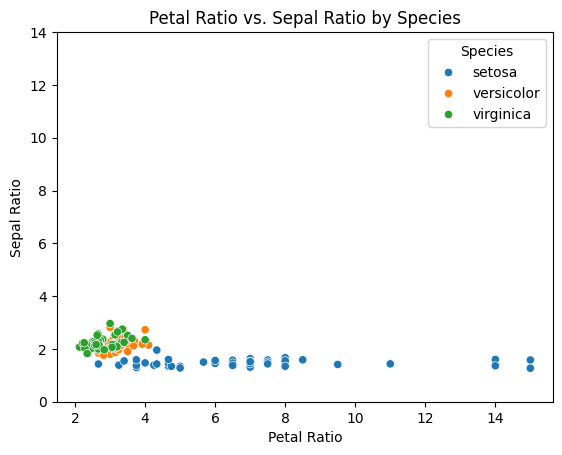

In [104]:
# Adding two new columns to the data set on the right
df['Petal Ratio'] = df['Petal Length'] / df['Petal Width']
df['Sepal Ratio'] = df['Sepal Length'] / df['Sepal Width']

# print descriptive statistics for two columns
print(df[['Petal Ratio', 'Sepal Ratio']].describe())

# scatter plot with seperation by hue.
sns.scatterplot(data= df, x= 'Petal Ratio', y= 'Sepal Ratio', hue= 'Species')
plt.xlabel('Petal Ratio')
plt.ylabel('Sepal Ratio')
plt.title('Petal Ratio vs. Sepal Ratio by Species')
plt.ylim(0,14)

plt.show()

### Conclusion
I originally thought that the dimensions of both the petals and sepals were going to have a very strong correlation. However, I found that the correlations are not as strong with a couple of species having a correlation below 0.5. This tells me as the flowers grows, the proportions of petals and sepals will vary significantly. How much will they vary? This is where the final analysis will fit in.

Stating off with the setosa's, I found that proportions of the petal dimensions can differ vastly, but the sepal proportions stay consistant between individual flowers. The other two species show a more consistant ratio of petal and sepal dimensions.

I really enjoyed this project because of the analysis process and having to repeat a step in the process to try and answer the questions. I hope you enjoyed as well!